In [1]:
# Copyright (c) 2024 Graphcore Ltd. All rights reserved.
import numpy as np
import matplotlib.pyplot as plt

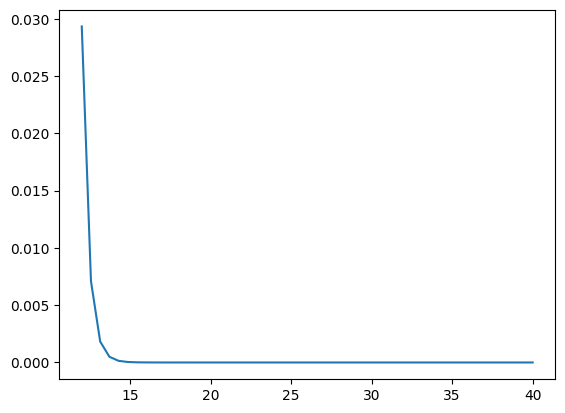

In [12]:
def factorial2(n):
    from scipy.special import factorial2

    return factorial2(np.maximum(n, 0))


def F(n, x):
    from scipy.special import gammainc, gamma

    xs = np.where(x == 0, 1.0, x)
    Fn = gammainc(n + 0.5, xs) * gamma(n + 0.5) / (2 * xs ** (n + 0.5))
    F0 = 1 / (2 * n + 1)
    return np.where(x == 0, F0, Fn)


def Fc(n, x):
    from scipy.special import gammaincc, gamma

    xs = np.where(x == 0, 1.0, x)
    Fn = (gamma(n + 0.5) - gamma(n + 0.5) * gammaincc(n + 0.5, xs)) / (
        2 * xs ** (n + 0.5)
    )
    F0 = 1 / (2 * n + 1)
    return np.where(x == 0, F0, Fn)


def Fasymp(n, x):
    return (
        factorial2(np.maximum(2 * n - 1, 1))
        / 2 ** (n + 1)
        * np.sqrt(np.pi / x ** (2 * n + 1))
    )


def F0(x):
    from scipy.special import erf

    xs = np.where(x == 0, 1.0, x)
    return np.where(x == 0, 1.0, np.sqrt(np.pi / xs) * erf(np.sqrt(xs)) / 2)


n = 30
x = np.linspace(12, 40)
# plt.plot(x, F(n, x))
# plt.plot(x, Fc(n, x))
plt.plot(x, np.abs(Fasymp(n, x) - F(n, x)))
# plt.plot(x, F0(x))